# 딥러닝 

## 딥러닝 개요

https://wikidocs.net/22882

- 머신 러닝(Machine Learning)의 특정한 한 분야로서 인공 신경망(Artificial Neural Network)의 층을 연속적으로 깊게 쌓아올려 데이터를 학습하는 방식

In [2]:
from IPython.display import Image

인공신경망 / AI 간략 히스토리
https://blog.naver.com/PostView.naver?blogId=samsjang&logNo=221142104977&categoryNo=87&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView&userTopListOpen=true&userTopListCount=10&userTopListManageOpen=false&userTopListCurrentPage=1

1943 MCP 뉴런, 이진출력

1958 Perceptron: 입력값에 곱해지는 가중치값 자동 학습 알고리즘

1969 Perceptron criticized: 다중퍼셉트론MLP로 XOR문제 풀어냄

1974 Backpropagation 오류 역전파 (sigmoid함수, Gradient Vanishing문제 직면)

1995 SVM, RandomForest reigns 

1998 CNN 새로운 인공신경망 고안(특정 뉴런만 활성화)

2000 활성함수 ReLU Rectifier, Gradient Vanishing 문제 해결

2006 Deep Learning (DNN 심층신경망을 학습시키는 방법), 복잡한 문제도 층의 개수가 많으면 해결가능

2012 AlexNet wins ImageNet / Google Brain Project on 16k Cores (이미지인식 오류율 26% → 15%로 감소)

2016 알파고, 자율주행자동차 적용 노력...

현재 GPU 발전으로 5% 이내의 오류율로 학습이 가능

## 7-1. 퍼셉트론 Perceptron

https://wikidocs.net/24958

- 초기 인공신경망

- 프랑크 로젠블라트가 1957년에 제안한 초기 형태의 인공신경망

- 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘

### 단층 퍼셉트론
- 입력층, 출력층 만 있음
- AND, NAND, OR 게이트는 구현 가능
- XOR 게이트는 구현을 못 함

In [1]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [2]:
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [3]:
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

### 다층 퍼셉트론 MLP
- 입력층, 출력층 외 중간에 층을 더 추가(은닉층)
- 다층 퍼셉트론: 은닉층이 1개 이상인 퍼셉트론
- 은닉층이 2개 이상인 신경망을 '심층 신경망 Deep Neural Network DNN'이라고 함

지금까지는 OR, AND, XOR 게이트 등. 퍼셉트론이 제대로 된 정답을 출력할 때까지 저자가 직접 가중치를 바꿔보면서 적절한 가중치를 수동으로 찾았음

하지만 이제는 기계가 가중치를 스스로 찾아내도록 자동화시킴: 머신러닝에서 말하는 훈련(training) 또는 학습(learning) 단계에 해당됨
- 이 때 손실 함수(Loss function)와 옵티마이저(Optimizer)를 사용
- 만약 학습을 시키는 인공 신경망이 심층 신경망일 경우에는 이를 심층 신경망을 학습시킨다고 하여, 딥 러닝(Deep Learning)이라고 함

### ★ 퍼셉트론에서 활성함수의 개념이 추가된 것이 인공신경망

## 7-2. 인공신경망의 학습과정
- 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(오차loss)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation, 인공 신경망에서 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정)를 수행
<br>

- 입력값$x$ → 가중치벡터$w_k^{(l)}$ 곱의 합 + 편향$b$ → 활성함수 $f^{(l)}$ → 은닉노드$h_k^{(l)}$로 구성된 은닉층$h^{(l)}$ → ……(반복)…… → 은닉노드 $h^{L}$ → 출력함수 $g(·)$ → 출력값 $o$

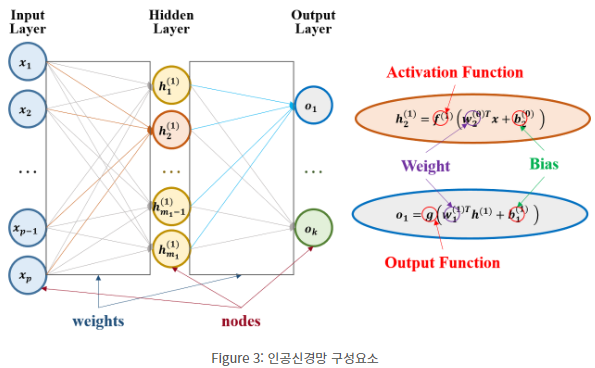

In [14]:
Image('Data/230627/10.png', width = 500)

### 활성화함수
- 뇌를 구성하는 신경세포 뉴런이 전위가 일정치 이상이 되면 시냅스가 화학적으로 연결되는 모습 모방
- 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수
- 퍼셉트론은 활성화함수로 계단함수를 사용
- 종류: 시그모이드, 소프트맥스 함수 등 
    - 예) 퍼셉트론의 활성화함수를 시그모이드로 변경하면 이진분류를 수행하는 로지스틱 회귀와 동일하게 됨
    
1) 비선형함수 (nonlinear)
    - 은닉층에서는 대부분 비선형함수를 사용하지 않음
    - 임베딩층은 선형층
    
2) Step함수

3) Sigmoid funcion
    - 미분해서 기울기 구할 때, 기울기가 완만해짐. 가중치와 편향을 업데이트 하는 과정인 역전파 과정에서 0에 가까운 값이 누적해서 곱해지게 됨. 앞단에는 기울기(미분값)가 잘 전달되지 않게 되어 기울기기 소실(Vanishing Gradient) 발생
    - 따라서 은닉층에서는 잘 사용하지 않음
    - 시그모이드 함수는 주로 이진 분류를 위해 출력층에서 사용
    
4) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

5) Relu함수
    - 0 이상의 입력값의 경우, 미분값이 항상 1
    - 깊은 신경망에서 시그모이드보다 훨씬 잘 작동
    - 입력값이 음수이면 미분값이 항상 0. 죽은 렐루가 됨
    
6) Leaky ReLU함수
$$ f(x) = max(ax, x)$$
    - $a$는 주로 0.01정도
    - 입력값이 음수라도 기울기가 0이 되지 않음
    
7) Softmax 함수
    - 출력층에서 주로 사용
    - 다중 클래스 분류 문제에 주로 사용됨 (이진분류시 출력층에 로지스틱회귀 사용)

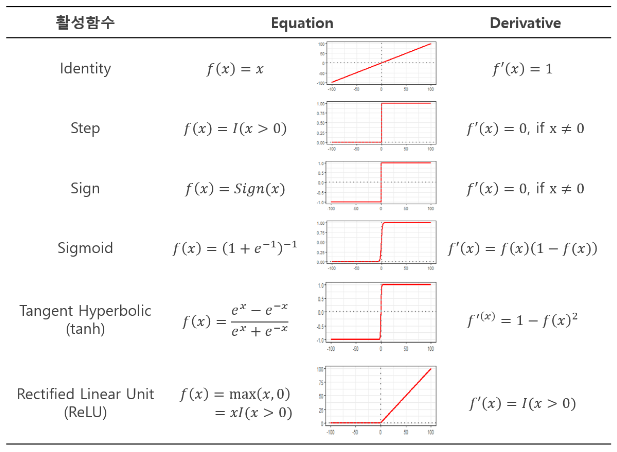

In [12]:
Image('Data/230627/8.png', width = 600)

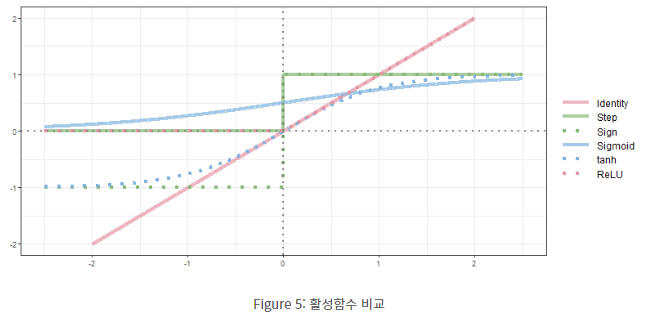

In [13]:
Image('Data/230627/9.png', width = 600)

## 7-3. 행렬곱

### 순전파 Forward Propagation
    - 주어진 입력이 입력층으로 들어가서 은닉층을 지나 출력층에서 예측값을 얻는 과정
    - 입력층에서 출력층 방향으로 예측값이 연산이 진행되는 과정

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim = 3, activation = 'softmax'))

model.summary()      # 매개변수(가중치w, 편향 b) 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


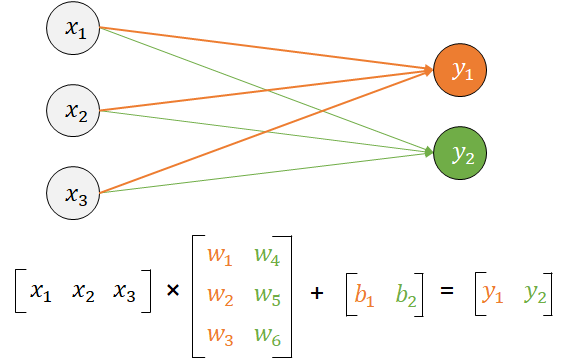

In [6]:
Image('Data/230626/10.png', width = 500)

- 입력 차원수(입력층 뉴런): 3개
<br> 출력 차원수(출력층 뉴런): 2개


- 화살표수: 6개   >>>> 가중치 $w$ 개수
<br> 출력차원수: 2개 >>>> 편향 $b$ 개수
<br> 총 학습가능한 매개변수 : 8개

$$ h_1 = x_1w_1 + x_2w_2 + x_3w_3 + b_1 $$
$$ h_2 = x_1w_4 + x_2w_5 + x_3w_6 + b_2 $$
$$ [y_1, y_2] = softmax([h_1, h_2]) $$

$$ Y = XW + B $$

### 행렬곱으로 병렬 연산
- 병렬 연산도 가능: 배치연산
- 인공신경망이 4개의 샘플을 동시에 처리한다고 가정하면 아래와 같음
- 학습가능한 매개변수의 수는 여전히 8개

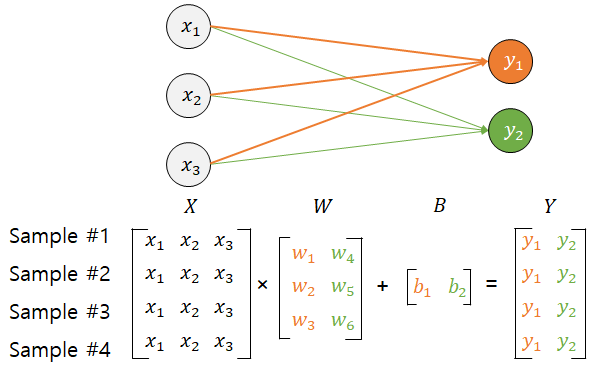

In [7]:
Image('Data/230626/11.png', width = 500)

### 다층 퍼셉트론 순전파

입력층 : 4개의 입력과 8개의 출력

은닉층1 : 8개의 입력과 8개의 출력

은닉층2 : 8개의 입력과 3개의 출력

출력층 : 3개의 입력과 3개의 출력

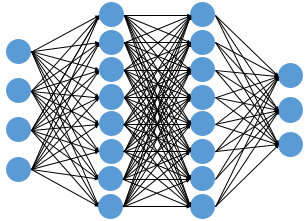

In [9]:
Image('Data/230626/12.png', width = 400)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))

#### 입력층 >> 은닉층1

$$ X_{m × n} × W_{m × n} + B_{m × j} = Y_{m × j} $$

$$ X_{1 × 4} × W_{m × n} + B_{m × j} = Y_{1 × 8} $$

$$ X_{1 × 4} × W_{4 × 8} + B_{1 × 8} = Y_{1 × 8} $$


#### 은닉층1 >> 은닉층2

$$ X_{1 × 8} × W_{8 × 8} + B_{1 × 8} = Y_{1 × 8} $$


#### 은닉층2 >> 은닉층3

$$ X_{1 × 8} × W_{8 × 3} + B_{1 × 3} = Y_{1 × 3} $$


#### 출력층에 활성화 함수 relu와 softmax가 존재하지만 활성화 함수는 행렬의 크기에 영향을 주지 않음

## 7-4. 딥러닝 학습방법

### 0) 변수 전처리
- (연속형) 최소최대 정규화 : [0,1] 사이의 값을 갖도록 만들어줌
- (범주형) One-Hot Encoding : 범주형변수의 값을 이진벡터로 매핑


### 1) 손실함수 Loss Function

- 실제값과 예측값의 차이를 수치화해주는 함수
- 이 두 값의 차이. 즉, 오차가 클 수록 손실함수의 값은 크고 오차가 작을수록 손실 함수의 값은 작아짐
- 종류: (회귀) 평균제곱오차 (분류) 크로스 엔트로피
- 손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 $w$와 편향 $b$의 값을 찾는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요

#### ① MSE (Mean Squared Error 평균 제곱 오차)
- 선형 회귀의 손실함수. 연속형 범주 예측 시 사용

Mean Squared Error Loss (Regression):
$$ l(\theta) = \sum_{i=1}^N \sum_{k=1}^K (y_{ik} - o_{ik})^2 $$

In [11]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics = ['mse'])

#### ② 이진 교차 엔트로피 Binary Cross-Entropy
- 로지스틱 회귀에서 사용했던 손실함수

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

#### ③ 범주형 교차 엔트로피 Categorical Cross-Entropy
- 출력층에 소프트맥스 함수를 사용해 다중클래스를 분류할 경우 사용: 'categorical_crossentropy'
- 레이블에 대해서 원-핫 인코딩 과정을 생략하고, 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행하고 싶을 경우 'sparse_categorical_crossentropy'사용

Cross Entropy Loss (Classification):
$$ l(\theta) = - \sum_{i=1}^N \sum_{k=1}^K y_{ik} log o_{ik} $$
- $ y_{ik}$ 는 실제값, $o_{ik}$ 는 계산된 결과값
- $ y_i = [0,0,...,1,...,0]^T $
- cross entropy loss 는 $o_{ik}$ 빼고 모두 0이 됨
- $o_{ik}$ 이 1에 가깝다면 손실함수가 0에 가까움, 가중치가 틀려서 0에 가깝다면 손실함수값이 커짐

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

In [ ]:
# 정수값 레이블 시
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

### 2) Batch Size에 따른 경사하강법

- Batch: 가중치 등 매개변수의 값을 조정하기 위해 사용하는 데이터의 양
    - 전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있음

#### ① 배치 경사하강법
- 오차 구할 때, 전체 데이터 고려
- 딥 러닝에서는 전체 데이터에 대한 한 번의 훈련 횟수를 1 에포크라고 하는데, 배치 경사 하강법은 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행함
- 단점: 한 번의 매개변수 업데이트에 시간이 오래걸리고 메모리를 크게 요구

In [ ]:
model.fit(X_train, y_train, batch_size=len(X_train))

#### ② 배치 크기가 1인 확률적 경사하강법 Stochastic Gradient Descent SGD
- 매개변수 값을 조정시, 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산
- 배치 경사하강법보다 매개변수의 변경폭이 불안정하고, 때로는 정확도가 낮을 수도 있지만, 하나의 데이터에 대해서만 메모리에 저장하면 되므로, 자원이 적은 컴퓨터에서도 쉽게 사용가능하고, 더 빠르게 계산 가능

In [ ]:
model.fit(X_train, y_train, batch_size=1)

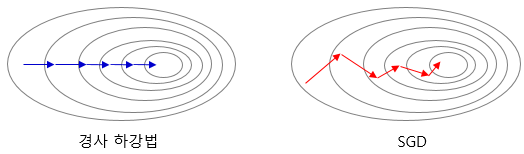

In [13]:
Image('Data/230626/13.png', width = 600)

#### ③ 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
- 전체 데이터도, 1개의 데이터도 아닐 때, 배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정하는 경사 하강법
- 장점: 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적

- model.fit() 에서 배치사이즈의 디폴트값은 32
<br> 배치 크기는 일반적으로 $2^n$에 해당하는 숫자로 선택하는 것이 보편적

In [ ]:
model.fit(X_train, y_train, batch_size=128)

### 3) Optimizer 옵티마이저

#### ① 모멘텀 Momentum
- 경사하강법에 관성을 더해줌
- 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영
    - 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줌
    
- 전체 함수에 걸쳐 최소값을 글로벌 미니멈(Global Minimum), 글로벌 미니멈이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)
- 로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황에서 모멘텀, 즉, 관성의 힘을 빌리면 값이 조절되면서 현재의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과를 얻을 수도 있음

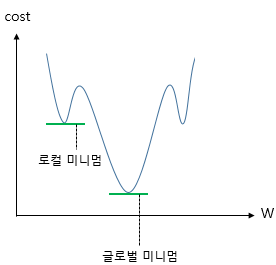

In [15]:
Image('Data/230626/14.png', width = 300)

In [ ]:
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

#### ② 아다그라드(Adagrad)
- 아다그라드는 각 매개변수에 서로 다른 학습률을 적용
    - 변화가 많은 매개변수는 학습률이 작게, 변화가 적은 매개변수는 학습률을 높게 설정
- 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적

In [ ]:
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

#### ③ 알엠에스프롭(RMSprop)
- 아다그라드가 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있는데 이를 다른 수식으로 대체하여 이러한 단점을 개선

In [ ]:
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)

#### ④ 아담(Adam)

- 아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법

In [ ]:
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#### 옵티마이저 사용방법
- 각 옵티마이저 인스턴스는 compile의 optimizer에서 호출

- optimizer='adam' : 아담이라는 옵티마이저 사용
<br> optimizer='sgd' : sgd 옵티마이저 사용
<br> optimizer='rmsprop' : rmsprop 옵티마이저 사용

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### 4) 역전파
인공 신경망이 해야할 일은 예측값과 실제값으로부터 오차를 계산하고, 오차로부터 가중치와 편향을 업데이트하는 일임 (인공 신경망의 학습 단계) 이때 인공 신경망은 순전파와는 반대 방향으로 연산을 진행하며 가중치를 업데이트하는데, 이 과정을 역전파(BackPropagation)라고 함

### 5) 에포크, 배치크기, 이터레이션

머신러닝에서는 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트하는 과정을 학습이라고 함
- 이를 현실의 학습에 비유하면 사람은 문제지의 문제를 풀고, 정답지의 정답을 보면서 채점을 하면서 부족했던 점을 깨달으며 머릿속의 지식이 업데이트되는 과정임
- 사람마다 동일한 문제지와 정답지를 주더라도 공부 방법은 다양함
    - 어떤 이는 문제지 하나를 다 풀고 나서 정답을 채점하는데, 다른 어떤 사람은 문제지의 문제를 10개 단위로 끊어서 공부. 문제 10개를 풀고 채점하고 다시 다음 문제 10개를 풀고 채점하고 반복
    - 게으른 사람은 문제지를 세 번 공부하는데, 성실한 사람은 문제지의 문제를 달달 외울만큼 문제지를 100번 공부

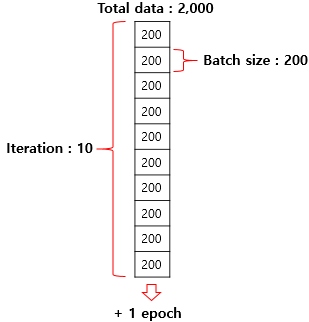

In [16]:
Image('Data/230626/15.png', width = 300)

#### ① 에포크 EPOCH
- 전체 데이터에 대해서 순전파와 역전파가 끝난 상태
    - 하나의 문제지에 비유한다면 문제지의 모든 문제를 처음부터 끝까지 다 풀고, 정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태
- 에포크가 50이면, 전체 데이터 단위로는 총 50번 학습
- 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생

#### ② 배치 크기 Batch Size
- 몇 개의 데이터 단위로 매개변수를 업데이트하는지
    - 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐
- 기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트함. 
    - 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점이라는 점이 중요
- 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점할 경우 배치크기는 200
    - 기게는 배치크기가 200이면, 200개 샘플 단위로 가중치 업데이트
- 배치크기 ≠ 배치 수 
    - 전체 데이터(에포크) 2000, 배치 크기 200 이면 배치 수: 10 (배치의 수를 이터레이션이라고 함)
    
#### ③ 이터레이션 Iteration 또는 스텝 Step
- 한 번의 에포크를 끝내기 위해 필요한 배치의 수
- 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수

- 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10
    - 한 번의 에포크 당 매개변수 업데이트가 10번 이루어짐
    - 예) 배치 크기가 1인 확률적 경사 하강법: 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행

## 7-5. 역전파 BackPropagation

### 1) 인공신경망의 이해

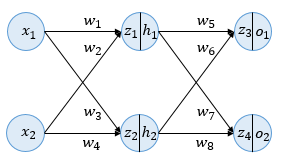

In [17]:
Image('Data/230626/16.png', width = 300)

- 입력층, 은닉층, 출력층 이렇게 3개의 층
<br> 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용
<br> 은닉층, 출력층, 활성화함수로 시그모이드 사용

- 변수 $z$는, 이전층의 모든 입력이 각각의 가중치와 곱해져 더해진 가중합. 시그모이드 함수를 거치지 않은 상태임
- 변수 $h$ 또는 $o$는, 시그모이드 함수 지난 후의 뉴런의 출력값임

### 2) 순전파

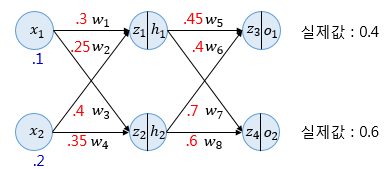

In [20]:
Image('Data/230626/17.png', width = 400)

#### 입력층 >>> 은닉층

$$ z_1 = w_1x_1 + w_2x_2 = 0.3 × 0.1 + 0.25 × 0.2 = 0.08 $$
$$ z_2 = w_3x_1 + w_4x_2 = 0.4 × 0.1 + 0.35 × 0.2 = 0.11 $$

$$ h_1 = sigmoid(z_1) = 0.51998934 $$
$$ h_2 = sigmoid(z_2) = 0.52747230 $$

#### 은닉층 >>> 출력층

$$ z_3 = w_5h_1 + w_6h_2 = 0.45 × h_1 + 0.4 × h_2 = 0.44498412 $$
$$ z_4 = w_7h_1 + w_8h_2 = 0.7 × h_1 + 0.6 × h_2 = 0.68047592 $$

$$ o_1 = sigmoid(z_3) = 0.60944600 $$
$$ o_2 = sigmoid(z_4) = 0.66384491 $$

#### 예측값과 실체값 오차 계산(손실함수) : MSE

$$ E_{o1} = \frac{1}{2}(target_{o1} - output_{o1})^2 = 0.02193381 $$
$$ E_{o2} = \frac{1}{2}(target_{o2} - output_{o2})^2 = 0.00203809 $$

$$ E_{total} = E_{o1} + E_{o2} = 0.02397190 $$

### 3) 역전파
- 출력층 바로 이전의 은닉층을 N층이라고 하였을 때, 출력층과 N층 사이의 가중치를 업데이트하는 단계를 역전파 1단계, 그리고 N층과 N층의 이전층 사이의 가중치를 업데이트 하는 단계를 역전파 2단계
- 역전파 1단계에서 업데이트 해야 할 가중치는 $w_5, w_6, w_7, w_8$ 총 4개

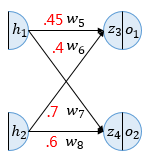

In [23]:
Image('Data/230626/18.png', width = 200)

https://wikidocs.net/37406

$w_5$ 업데이트를 위한 계산
$$ \frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial o_1} × \frac{\partial o_1}{\partial z_3} × \frac{\partial z_3}{\partial w_5}$$

- 첫 번째 항: $ E_{total} 전체 오차값$

$$ E_{total} = \frac{1}{2}(target_{o1} - output_{o1})^2 + \frac{1}{2}(target_{o2} - output_{o2})^2 $$

$$ \frac{\partial E_{total}}{\partial o_1} = 2 × \frac{1}{2}(target_{o1} - output_{o1})^{2-1}×(-1) + 0 
= -(0.4 - 0.60944600) = 0.20944600 $$

- 두 번째 항(시그모이드 함수 미분):

$$ sigmoid: \frac{\partial f(x)}{\partial x} = f(x) (1 - f(x)) $$

$$ o_1 = sigmoid(z_3)) $$

$$ \frac{\partial o_1}{\partial z_3} = o_1 × (1 - o_1) = 0.60944600(1-0.60944600) = 0.23802157 $$

- 세번째 항:
$$ z_3 = w_5h_1 + w_6h_2 $$

$$ \frac{\partial z_3}{\partial w_5} = h_1 = 0.51998934 $$

- 토탈: 
$$ \frac{\partial E_{total}}{\partial w_5} = 0.20944600 × 0.23802157 × 0.51998934 = 0.02592286 $$ 


- 따라서 가중치 업데이트 ($\alpha = 0.5$: 학습률) 
$$ w_5^{+} = w_5 - \alpha\frac{\partial E_{total}}{\partial w_5} = 0.45 - 0.5 × 0.02592286 = 0.43703857 $$

    - 미분값(기울기): 가중치가 1만큼 변할 때 오차가 얼마만큼 변하나
    - -: 오차를 줄이는 방향으로 가중치 업데이트

<br>
- 같은 원리로 $w_6^{+},w_7^{+},w_8^{+}$ 계산

$$ \frac{\partial E_{total}}{\partial w_6} = \frac{\partial E_{total}}{\partial o_1} × \frac{\partial o_1}{\partial z_3} × \frac{\partial z_3}{\partial w_6} → w_6^{+} = 0.38685205 $$

$$ \frac{\partial E_{total}}{\partial w_7} = \frac{\partial E_{total}}{\partial o_1} × \frac{\partial o_1}{\partial z_3} × \frac{\partial z_3}{\partial w_7} → w_7^{+} = 0.69629578 $$

$$ \frac{\partial E_{total}}{\partial w_8} = \frac{\partial E_{total}}{\partial o_1} × \frac{\partial o_1}{\partial z_3} × \frac{\partial z_3}{\partial w_8} → w_8^{+} = 0.59624247 $$


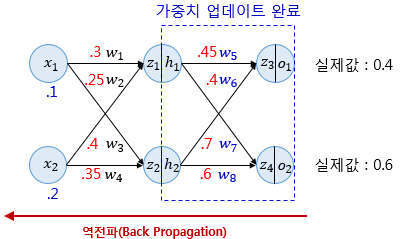

In [5]:
Image('Data/230627/0.png', width = 500)

가중치 $w_1$ 업데이트를 위한 계산

$$ \frac{\partial E_{total}}{\partial w_1} = \frac{\partial E_{total}}{\partial h_1} × \frac{\partial h_1}{\partial z_1} × \frac{\partial z_1}{\partial w_1}$$

- 첫 번째 항: $ E_{total} 전체 오차값$

$$ E_{total} = E_{01} + E_{02} = \frac{1}{2}(target_{o1} - o_1)^2 + \frac{1}{2}(target_{o2} -o_2)^2 $$

$$ o_1 = sigmoid(w_5h_1 + w_6h_2) $$
$$ o_2 = sigmoid(w_7h_1 + w_8h_2) $$

$$ \frac{\partial E_{total}}{\partial h_1} = \frac{\partial (E_{01} + E_{02})}{\partial h_1} = \frac{\partial E_{01}}{\partial h_1} + \frac{\partial E_{02}}{\partial h_1} $$

$$
\begin{align}
\frac{\partial E_{01}}{\partial h_1} & = \frac{\partial E_{01}}{\partial o_1} × \frac{\partial o_1}{\partial z_3} × \frac{\partial z_3}{\partial h_1} \\
& = - (target_{o1} - output_{o1}) × o_1 × (1 - o_1) × w_5 \\
& = 0.209446 × 0.23802157 × 0.45 \\
& = 0.02243370 
\end{align}$$

$$
\frac{\partial E_{02}}{\partial h_1} = \frac{\partial E_{02}}{\partial o_2} × \frac{\partial o_2}{\partial z_4} × \frac{\partial z_4}{\partial h_1} = 0.00997311
$$

$$ \frac{\partial E_{total}}{\partial h_1} = 0.02243370 + 0.00997311 = 0.03240681 $$

- 두 번째 항: 
$$ \frac{\partial h_1}{\partial z_1} = h_1 × (1 - h_1) = 0.51998934 (1-0351998934) = 0.24960043 $$

- 세 번째 항:
$$ \frac{\partial z_1}{\partial w_1} = x_1 = 0.1 $$

- 토탈: 
$$ \frac{\partial E_{total}}{\partial w_1} = 0.03240681 × 0.24960043 × 0.1 = 0.00080888 $$
<br>

- 가중치 업데이트 ($\alpha = 0.5$: 학습률) 
$$ w_1^{+} = w_1 - \alpha\frac{\partial E_{total}}{\partial w_1} = 0.3 - 0.5 × 0.00080888 = 0.29959556 $$
<br>

- 위의 $w_1^{+}$와 동일한 방식으로  $w_1^{+},w_2^{+},w_3^{+},w_4^{+}$ 계산

$$w_1^{+} = 0.29959556 $$

$$w_2^{+} = 0.24919112 $$

$$w_3^{+} = 0.39964496 $$

$$w_4^{+} = 0.34928991 $$

### 업데이트된 가중치로 순전파를 진행 → 오차 감소 확인!!! 

$$ E_{o1} = \frac{1}{2}(target_{o1} - output_{o1})^2 = 0.02125445 $$
$$ E_{o2} = \frac{1}{2}(target_{o2} - output_{o2})^2 = 0.00198189 $$

$$ E_{total} = E_{o1} + E_{o2} = 0.02323634 < 0.02397190 $$

역전파 편미분 설명 

https://www.philgineer.com/2021/09/27-5.html

## 7-6. 과적합 overfitting 을 막는 방법들

### ① 데이터 양 늘리기
- 데이터의 양을 늘릴수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지
- 데이터 증식 또는 증강(Data Augmentation): 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식
- 예) 텍스트 데이터의 경우, 데이터를 증강하는 방법으로 번역 후 재번역을 통해 새로운 데이터를 만들어내는 역번역(Back Translation) 등의 방법이 있음

### ② 모델 복잡도 줄이기
- NN의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정
    - 매개변수들의 수를 모델의 수용력(capacity)이라고 하기도 함

### ③ 가중치 규제 Regularization 적용하기
- $\lambda$: 규제의 강도를 정하는 하이퍼파라미터
    - $\lambda$가 크다면 모델이 훈련 데이터에 대해 적합한 매개변수를 찾는 것보다 규제를 위해 추가된 항들을 작게 유지하는 것을 우선한다는 뜻 
    
- L1 규제: 가중치 w들의 절대값 합계를 비용함수에 추가
$$ \lambda|w| $$
- L2 규제: 가중치 w들의 제곱합을 비용함수에 추가
$$ \frac{1}{2}\lambda w^2 $$

- 비용함수 최소화를 위해서는 가중치 $w$의 값이 작아져야 함

### ④ 드롭아웃 Dropout 
- 신경망의 일부를 사용하지 않는 방법
- 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지
- 학습시에만 사용하고 예측시에는 사용하지 않음

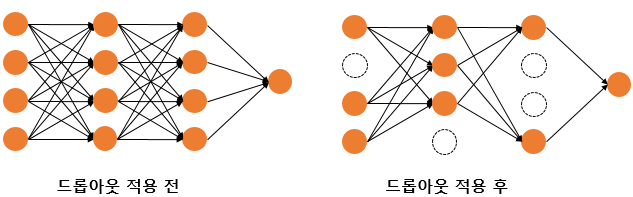

In [8]:
Image('Data/230627/7.png', width = 600)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))

인공신경망 설명

https://yjjo.tistory.com/5

## 7-7. Gradient Vanishing 기울기소실 과 폭주 Exploding

https://wikidocs.net/61375

- 기울기 소실(Gradient Vanishing): 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상

- 기울기 폭주(Gradient Exploding): 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산 (RNN에서 쉽게 발생)

### 1) ReLU와 ReLU의 변형
- 활성화함수로 시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워짐

- 개선방안: 은닉층에서 ReLU나 Leaky ReLU와 같은 ReLU함수의 변형을 사용

###  2) Gradient Clipping 
- 기울기값 자르기
- 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자름. 임계치만큼 크기를 감소시킴

In [ ]:
from tensorflow.keras import optimizers

Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)

### 3) 가중치 초기화 Weight Initialization

- 가중치 초기값에 따라 모델 훈련결과가 달라짐

#### ① 세이비어 초기화 Xavier initialization
 
#### ② He 초기화 He initialization